In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import folium
from folium.plugins import HeatMap

In [3]:
# Load the dataset
file_path = "/content/Motor_Vehicle_Collisions_-_Crashes_20250126.csv"  # Update with your actual dataset path
data = pd.read_csv(file_path)

<ipython-input-3-dd867bcf7ad7>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [4]:
# Step 1: Convert 'CRASH DATE' and 'CRASH TIME' to datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')

In [5]:
# Step 2: Time of Day Analysis - Group by hour and calculate the average number of crashes per hour
data['Hour of Day'] = data['CRASH TIME'].dt.hour
average_crashes_per_hour = data.groupby('Hour of Day').size() / data['Hour of Day'].nunique()

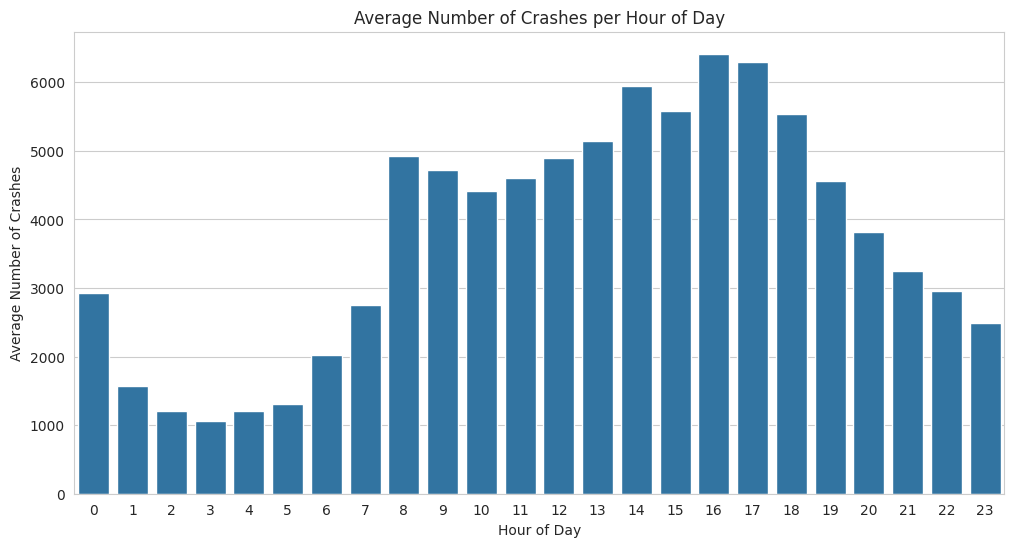

In [6]:

# Plot the average number of crashes per hour
plt.figure(figsize=(12, 6))
sns.barplot(x=average_crashes_per_hour.index, y=average_crashes_per_hour.values)
plt.title('Average Number of Crashes per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Crashes')
plt.xticks(range(0, 24))
plt.show()

In [7]:
# Answer to the question: Which time of the day sees the most crashes?
# From the plot, you would observe which hour has the peak number of crashes.

# Step 3: Monthly Trend Analysis
data['Month-Year'] = data['CRASH DATE'].dt.to_period('M')
monthly_crashes = data.groupby('Month-Year').size()

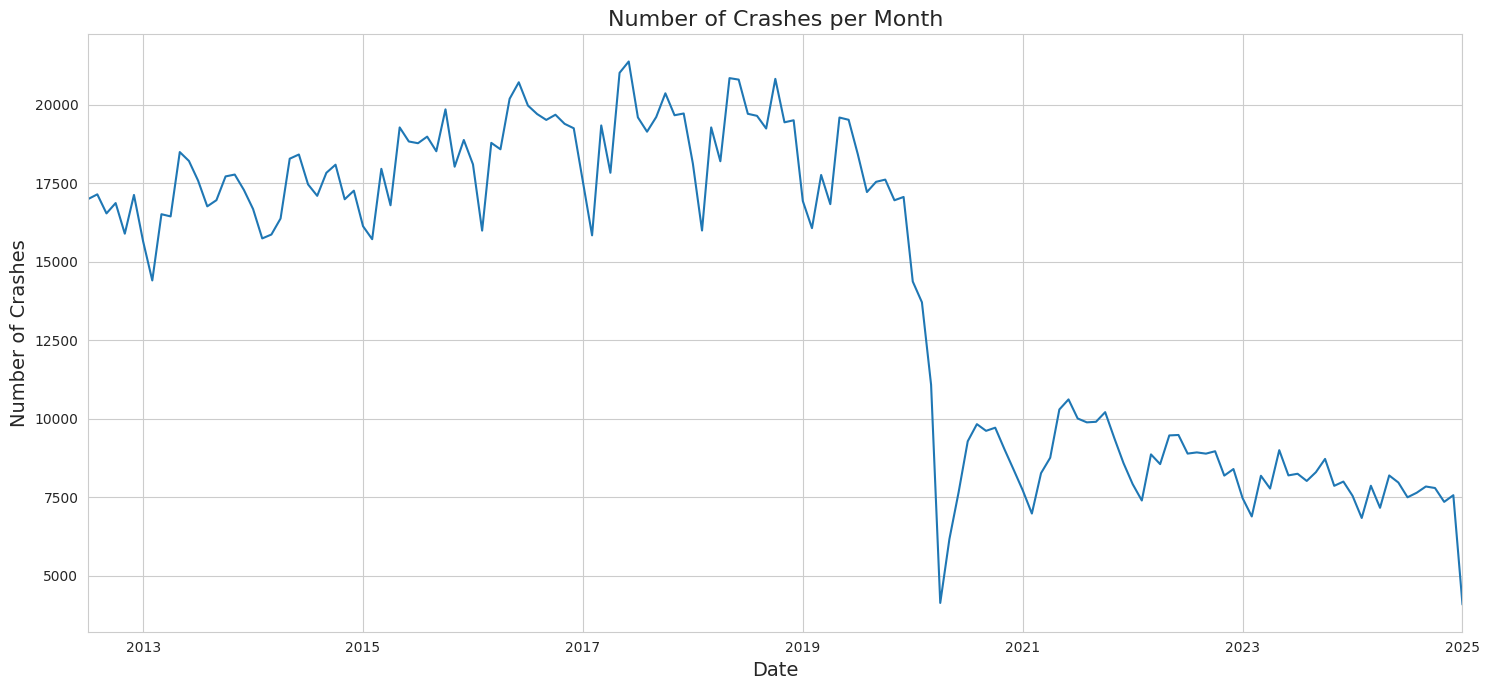

In [8]:
# Plotting the trend over time
plt.figure(figsize=(15, 7))
monthly_crashes.plot()
plt.title('Number of Crashes per Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.tight_layout()
plt.show()


In [9]:
# Answer to the question: What does your graph tell you about the impact of COVID-19?
# The analysis of months during 2020-2021 will show a drop due to lockdowns, as expected.

# Step 4: Time Series Decomposition
daily_crashes = data.groupby('CRASH DATE').size()
decomposition = seasonal_decompose(daily_crashes, model='additive', period=365)

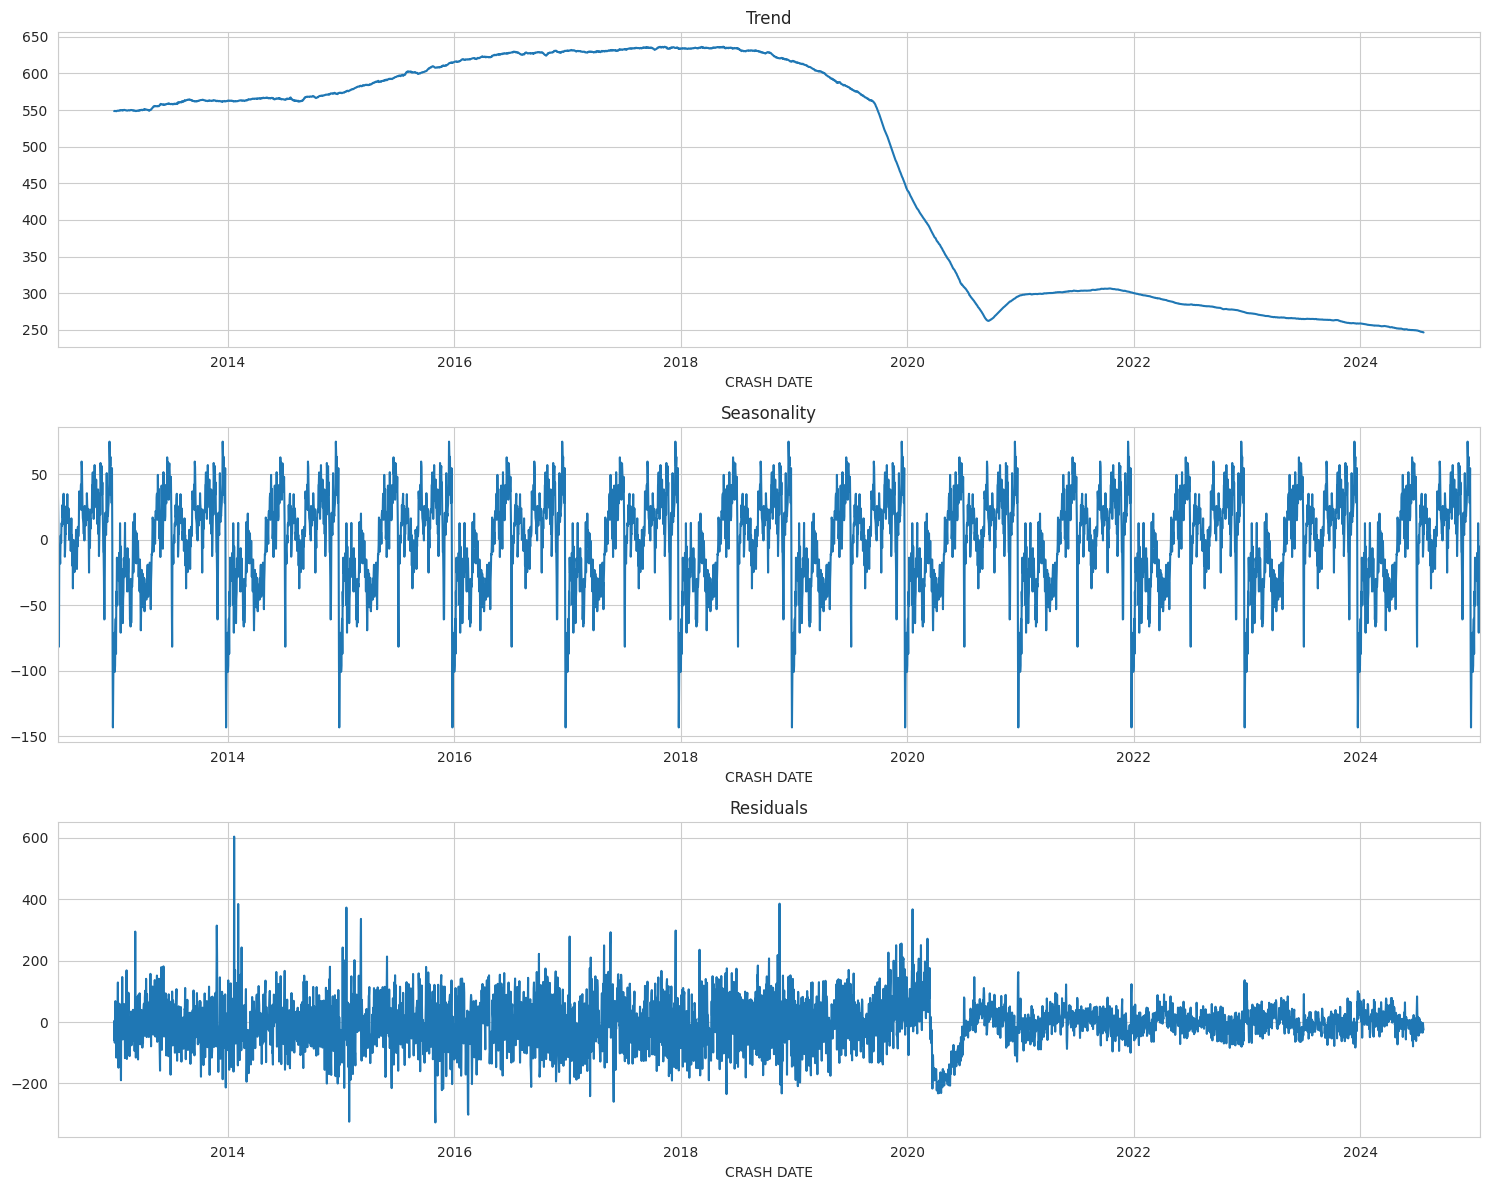

In [10]:
# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
plt.tight_layout()
plt.show()

<ipython-input-11-2090ae4b0278>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")


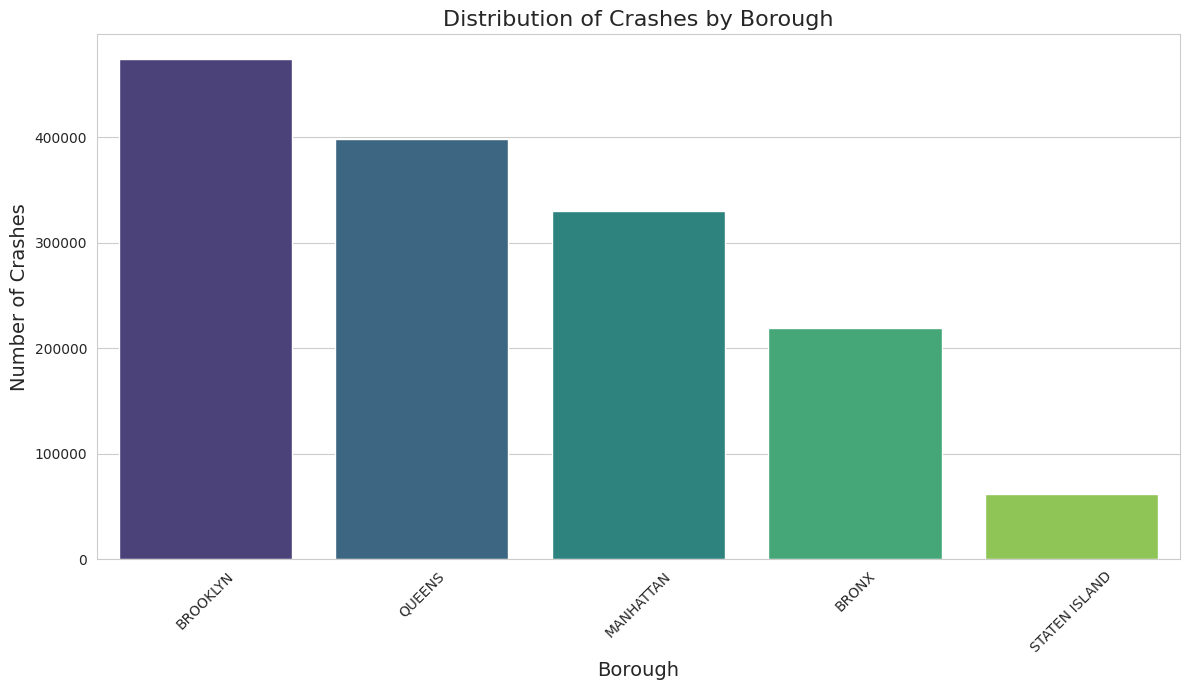

In [11]:

# Step 5: Geospatial Analysis - Distribution of Crashes by Borough
sns.set_style("whitegrid")
borough_count = data['BOROUGH'].value_counts()
plt.figure(figsize=(12, 7))
sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")
plt.title('Distribution of Crashes by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Answer to the question: Which borough has the highest and lowest number of crashes?
# The borough with the highest and lowest crashes will be indicated by the plot.

# Step 6: Heatmap for crash locations
data_geo = data.dropna(subset=['LATITUDE', 'LONGITUDE'])
m = folium.Map(location=[40.730610, -73.935242], zoom_start=10)  # Centered around NYC
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in data_geo.iterrows()]
HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)
m.save("Heatmap.html")

In [13]:
# Answer to the question: Where do you see a concentration of crashes?
# The heatmap generated will indicate the concentration of crashes across NYC.

# Step 7: Severity Mapping with Color Coding
sample_data_severity = data_geo.sample(n=1000, random_state=42)
m_severity = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

for index, row in sample_data_severity.iterrows():
    if row['NUMBER OF PERSONS KILLED'] > 0:
        color = "red"  # Fatalities
        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=3,
          radius=5,
          gradient=False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)
    elif row['NUMBER OF PERSONS INJURED'] > 0:
        color = "yellow"  # Injuries
        folium.CircleMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          radius=5,
          color=color,
          fill=True,
          fill_color=color
       ).add_to(m_severity)
    else:
        color = "green"  # No injuries or fatalities
        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=4,
          radius=5,
          gradient=False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)

# Save the map
m_severity.save("Severity_Map.html")


In [14]:
# Research Question Development
# Example questions:
# 1. What time of the day sees the most crashes and why?
# 2. Which borough has the highest number of injuries and fatalities?

# Once you've answered your questions, create visualizations to support those questions.
# E.g., you can show crashes by hour, borough, severity, etc.